In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [ ]:
data = pd.read_csv('/content/Music Preference (Responses) - Form Responses 1.csv')

In [ ]:
data.shape

(117, 22)

In [ ]:
age = data.Age[0:57]

In [ ]:
age

0      1/19/2001
1     11/24/2000
2      10/3/1998
3       5/7/2001
4       2/7/1998
5     12/26/1998
6     11/12/1996
7      9/22/2001
8      1/29/2000
9      11/1/2000
10     2/19/2000
11     8/10/2000
12     8/10/2000
13     6/20/2000
14      9/6/2000
15     1/19/1999
16     7/16/2000
17     4/28/2001
18      6/1/2001
19     2/15/2001
20     11/7/2000
21     1/13/1990
22    11/10/1953
23     7/28/1958
24    11/16/1980
25     11/4/1973
26     6/15/2000
27      8/3/2000
28     9/25/1959
29     6/28/1996
30     6/26/1960
31     1/22/2021
32     1/31/2001
33    11/23/2000
34      7/2/2001
35     7/13/1958
36     8/28/1999
37     1/22/2019
38     7/22/1982
39     4/28/2002
40     5/25/2001
41      5/1/1987
42      8/2/1999
43      7/1/1958
44     8/12/1984
45      8/3/1980
46      5/9/1961
47      7/7/2002
48      1/3/2002
49    12/24/1962
50    10/26/2000
51     11/3/2000
52     3/20/2003
53     1/22/2021
54     7/31/1962
55      9/9/2000
56     6/10/2021
Name: Age, dtype: object

In [ ]:
age = pd.to_datetime(age, errors='coerce')## convert to standard date time format

In [ ]:
age = pd.to_datetime(age)
age = age.apply(lambda x : (pd.datetime.now().year - x.year))## obtain age from the given DOB according to 2021

In [ ]:
age

0     20
1     21
2     23
3     20
4     23
5     23
6     25
7     20
8     21
9     21
10    21
11    21
12    21
13    21
14    21
15    22
16    21
17    20
18    20
19    20
20    21
21    31
22    68
23    63
24    41
25    48
26    21
27    21
28    62
29    25
30    61
31     0
32    20
33    21
34    20
35    63
36    22
37     2
38    39
39    19
40    20
41    34
42    22
43    63
44    37
45    41
46    60
47    19
48    19
49    59
50    21
51    21
52    18
53     0
54    59
55    21
56     0
Name: Age, dtype: int64

In [ ]:
data.Age[0:57]=age

In [ ]:
data.head()

In [ ]:
age2 = data.Age.to_numpy(dtype='int')# convert PD frame to numpy array

In [ ]:
import math
mean = math.floor(age2.mean()) # mean without decimals

In [ ]:
mean

31

In [ ]:
import math
age2=np.where(age2<10,mean,age2) # replace age with mean if value is less than 10, remains same if >10

In [ ]:
age2

array([20, 21, 23, 20, 23, 23, 25, 20, 21, 21, 21, 21, 21, 21, 21, 22, 21,
       20, 20, 20, 21, 31, 68, 63, 41, 48, 21, 21, 62, 25, 61, 31, 20, 21,
       20, 63, 22, 31, 39, 19, 20, 34, 22, 63, 37, 41, 60, 19, 19, 59, 21,
       21, 18, 31, 59, 21, 31, 18, 33, 58, 62, 62, 20, 43, 58, 58, 54, 20,
       32, 60, 20, 32, 65, 59, 59, 20, 62, 39, 19, 20, 69, 55, 64, 49, 60,
       57, 15, 20, 50, 21, 47, 16, 54, 22, 19, 19, 19, 19, 20, 25, 27, 20,
       18, 21, 23, 21, 17, 17, 17, 17, 20, 24, 18, 19, 54, 60, 23])

In [ ]:
data.Age = age2

In [ ]:
data.head()

In [ ]:
data=data.rename(columns={'I am a student':'Student','Home State':'State','Mother Tongue':'MotherTongue','My 1st Language preference for streaming music':'MY1L','My 2nd Language preference for streaming music':'MY2L','My 3rd Language preference for streaming music':'MY3L','Do you like listening to old songs':'RateOldSongs','Do you like listening to devotional songs':'RateDevSongs','I love listening to music':'RateMusic','Choose the set that contains your most favorite genres':'GeneresPreference','At what time you listen to music a lot':'MusicTime','Why do you listen to music':'Reason','How likely you enjoy music while you are traveling':'MusicWhileTravelling'})

In [ ]:
data.Student[data.Student == 'Yes'] = 1
data.Student[data.Student == 'No'] = 0  ## changing to numerical values

In [ ]:
data.Gender[data.Gender == 'Male'] = 1
data.Gender[data.Gender == 'Female'] = 0## changing to numerical values

In [ ]:
data.head()

In [ ]:
data=data.drop(columns=['Stream(Optional)'])

In [ ]:
state =data.State.to_numpy(dtype='str')

In [ ]:
data.State.unique()

array(['Andhara Pradesh ', 'Tamil nadu', 'Telangana', 'Andhra pradesh',
       'Andhra Pradesh', 'Tripura', 'Telangana ', 'Andhra Pradesh ',
       'Telengana', 'Kerala', 'Karnataka', 'Andhra predesh', 'Ap',
       'Tamil Nadu', 'Andhrapradesh', 'West bengal', 'andhra pradesh',
       'Andrapradesh', 'Andra Pradesh', 'Neyveli, tamil Nadu', 'AP',
       'A.P.', 'Berhampur, Orissa', 'AndhraPradesh', 'Andhra Prafesh',
       'Visakhaoatnam,Ap', 'Vizag, Andhrapradesh ', 'Andhra pradesh ',
       'ap', 'Odisha', 'Ap and Karnataka', '𝐴𝑛𝑑ℎ𝑟𝑎 𝑝𝑟𝑎𝑑𝑒𝑠ℎ'], dtype=object)

In [ ]:
list_of_states = ['Andhara Pradesh','AP','Tamil nadu','Telangana','Kerala','Orissa','Tripura','Karnataka','West Bengal']## listing unique ones

In [ ]:
pip install fuzzywuzzy # string matching library

In [ ]:
pip install python-Levenshtein


In [ ]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

In [ ]:
statesdict = {
    'Andhara Pradesh':0,
     'AP':0,
    'Tamil nadu':1,
    'Telangana':2,
     'Kerala':3,
    'Orissa':4,
    'Tripura':5,
    'Karnataka':6,
    'West Bengal':7
}

In [ ]:
for i in range(0,state.size):
 state[i]=np.where(True,statesdict[process.extractOne(state[i], list_of_states)[0]],"") ## matches our original state to the ones in dictionary and returns it.

In [ ]:
state

array(['0', '1', '0', '2', '0', '0', '5', '0', '0', '2', '0', '0', '0',
       '2', '0', '0', '0', '2', '0', '3', '0', '0', '6', '6', '0', '0',
       '0', '0', '2', '0', '2', '0', '1', '2', '0', '0', '0', '7', '0',
       '0', '0', '0', '0', '0', '0', '2', '2', '3', '2', '0', '0', '1',
       '0', '0', '0', '2', '0', '2', '0', '0', '0', '0', '0', '2', '0',
       '0', '4', '0', '0', '0', '2', '0', '2', '0', '0', '2', '0', '0',
       '2', '2', '0', '0', '0', '0', '0', '0', '2', '2', '2', '2', '0',
       '2', '0', '0', '0', '0', '0', '0', '0', '4', '2', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0'],
      dtype='<U21')

In [ ]:
data.State=state

In [ ]:
data.head()

In [ ]:
data.MotherTongue.unique()

array(['Telugu', 'Tamil', 'Telugu ', 'Bengali', 'Assamese ', 'Urdu',
       'Malayalam', 'Kolkata', 'telugu', 'Kannada', 'TELUGU', 'tekugy',
       '𝑇𝑒𝑙𝑢𝑔𝑢', 'Telegu'], dtype=object)

In [ ]:
list_of_langs=['Telugu','Tamil','Hindi','Malayalam','Urdu','Kannada','Kolkata','Assamese','Korean','Japneese','Punjabi','Bengali']
#here kolkata means bengali

In [ ]:
lang_dict = {
    'Telugu':0,
     'Tamil':1,
    'Hindi':2,
    'Malayalam':3,
     'Urdu':4,
     'Kannada':5,
     'Kolkata':6,
     'Assamese':7,
     'Korean':8,
     'Japneese':9,
      'Bengali':10,
       'Punjabi':11
}

In [ ]:
langs=data.MotherTongue.to_numpy(dtype='str')

In [ ]:
langs

array(['Telugu', 'Tamil', 'Telugu', 'Telugu ', 'Telugu ', 'Telugu',
       'Bengali', 'Telugu', 'Telugu', 'Telugu', 'Telugu', 'Telugu',
       'Telugu', 'Assamese ', 'Telugu', 'Urdu', 'Telugu', 'Telugu',
       'Telugu', 'Malayalam', 'Telugu', 'Telugu', 'Telugu', 'Telugu',
       'Telugu ', 'Telugu ', 'Telugu', 'Telugu', 'Telugu', 'Telugu',
       'Telugu ', 'Telugu', 'Tamil', 'Telugu', 'Telugu', 'Telugu',
       'Telugu', 'Kolkata', 'telugu', 'Telugu', 'Telugu', 'Telugu',
       'Telugu ', 'Telugu', 'Telugu', 'Telugu', 'Telugu ', 'Malayalam',
       'Telugu', 'Telugu', 'Telugu', 'Tamil', 'Telugu ', 'Telugu',
       'Telugu', 'Telugu', 'Telugu', 'Telugu', 'Telugu', 'Telugu',
       'Telugu', 'Telugu ', 'Telugu', 'Telugu', 'Telugu', 'Telugu',
       'Telugu', 'Telugu', 'Kannada', 'Telugu ', 'Telugu', 'Telugu',
       'Telugu', 'Telugu', 'Telugu', 'Telugu', 'Telugu', 'TELUGU',
       'Telugu', 'Telugu ', 'Telugu', 'Telugu', 'Telugu', 'Telugu ',
       'Telugu', 'Telugu', 'Telugu', 'Urdu'

In [ ]:
for i in range(0,langs.size):
 langs[i]=np.where(True,lang_dict[process.extractOne(langs[i], list_of_langs)[0]],"")

In [ ]:
langs

array(['0', '1', '0', '0', '0', '0', '10', '0', '0', '0', '0', '0', '0',
       '7', '0', '4', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '6', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '4', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '5', '5', '5', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype='<U9')

In [ ]:
data.MotherTongue=langs

In [ ]:
data.head()

In [ ]:
myl1=data.MY1L.to_numpy(dtype='str')
myl2=data.MY2L.to_numpy(dtype='str')
myl3=data.MY3L.to_numpy(dtype='str')

In [ ]:
for i in range(0,myl1.size):
 myl1[i]=np.where(True,lang_dict[process.extractOne(myl1[i], list_of_langs)[0]],"vcx")

In [ ]:
for i in range(0,myl2.size):
 myl2[i]=np.where(True,lang_dict[process.extractOne(myl2[i], list_of_langs)[0]],"vcx")

In [ ]:
for i in range(0,myl3.size):
 myl3[i]=np.where(True,lang_dict[process.extractOne(myl3[i], list_of_langs)[0]],"vcx")

In [ ]:
myl1

array(['0', '1', '0', '0', '0', '0', '2', '10', '2', '0', '0', '2', '2',
       '10', '10', '10', '0', '0', '10', '8', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '5', '0', '0', '1', '0', '2', '0', '0', '10',
       '10', '0', '0', '0', '0', '0', '0', '0', '0', '3', '10', '0', '8',
       '1', '10', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '10', '0',
       '0', '0', '0', '2', '0', '0', '0', '10', '0', '0', '0', '0', '10',
       '0', '2', '0', '0', '0', '0', '0', '0', '3', '10', '0', '10', '0',
       '0', '0', '0', '1', '1', '1', '10', '0', '0', '0', '0', '0', '2',
       '0'], dtype='<U9')

In [ ]:
myl2

array(['2', '10', '10', '2', '2', '10', '11', '0', '10', '10', '2', '10',
       '10', '2', '0', '4', '0', '2', '2', '10', '2', '2', '2', '2', '2',
       '2', '10', '10', '0', '2', '2', '7', '0', '2', '0', '0', '2', '2',
       '0', '2', '0', '0', '1', '10', '2', '2', '2', '2', '2', '2', '0',
       '8', '0', '2', '2', '2', '2', '2', '2', '2', '2', '10', '3', '2',
       '0', '2', '1', '2', '2', '0', '10', '2', '2', '0', '2', '0', '10',
       '2', '2', '2', '0', '1', '2', '2', '2', '0', '10', '2', '2', '2',
       '2', '10', '2', '11', '1', '2', '2', '2', '1', '0', '10', '10',
       '2', '10', '1', '10', '0', '0', '0', '0', '0', '1', '1', '2', '2',
       '10', '2'], dtype='<U15')

In [ ]:
myl3

array(['10', '3', '2', '10', '10', '10', '11', '2', '0', '2', '1', '0',
       '0', '8', '2', '0', '10', '10', '0', '10', '1', '10', '2', '2',
       '2', '10', '2', '2', '5', '0', '10', '2', '5', '10', '11', '0',
       '1', '10', '0', '3', '0', '0', '2', '2', '1', '10', '10', '10',
       '11', '0', '10', '3', '2', '10', '0', '10', '10', '8', '10', '0',
       '10', '2', '1', '10', '0', '1', '3', '0', '5', '0', '2', '0', '0',
       '0', '1', '2', '10', '0', '10', '10', '10', '2', '10', '1', '2',
       '2', '3', '2', '1', '0', '2', '0', '2', '1', '3', '10', '10', '1',
       '2', '2', '2', '10', '10', '2', '2', '1', '10', '10', '10', '2',
       '0', '2', '10', '1', '10', '0', '10'], dtype='<U19')

In [ ]:
data.MY1L=myl1
data.MY2L=myl2
data.MY3L=myl3

In [ ]:
data.head()

In [ ]:
gp=data.GeneresPreference.to_numpy(dtype='str')

In [ ]:
gp_list=['Classical,Blues,Folk,Jazz','Alternative,Rock,HeavyMetal','Country, Religious, Pop, Soundtracks/theme','Dance/Electronica, Rap/hip-hop, Soul/funk']

In [ ]:
gp_dict = {
    'Classical,Blues,Folk,Jazz':0,
    'Alternative,Rock,HeavyMetal':1,
    'Country, Religious, Pop, Soundtracks/theme':2,
    'Dance/Electronica, Rap/hip-hop, Soul/funk':3
}

In [ ]:
for i in range(0,gp.size):
 gp[i]=np.where(True,gp_dict[process.extractOne(gp[i], gp_list)[0]],"vcx")

In [ ]:
gp

array(['0', '2', '3', '2', '3', '3', '2', '1', '3', '1', '0', '0', '0',
       '0', '2', '2', '2', '0', '3', '2', '0', '3', '0', '0', '2', '0',
       '1', '0', '0', '0', '2', '2', '0', '3', '0', '2', '3', '2', '1',
       '2', '2', '0', '2', '0', '0', '3', '0', '1', '3', '0', '3', '2',
       '2', '0', '0', '0', '0', '3', '0', '0', '0', '2', '2', '2', '0',
       '0', '0', '3', '3', '2', '2', '3', '2', '2', '0', '2', '0', '0',
       '0', '0', '0', '0', '2', '0', '2', '0', '3', '1', '2', '3', '0',
       '3', '0', '0', '0', '3', '3', '0', '3', '2', '0', '2', '2', '0',
       '0', '0', '3', '3', '3', '2', '3', '3', '3', '2', '2', '2', '0'],
      dtype='<U42')

In [ ]:
data.GeneresPreference = gp

In [ ]:
data.head()

In [ ]:
data=data.drop(columns=['My 1st Favourite song Language, Album/Artist','My 2nd Favourite song Language, Album/Artist','My 3rd Favourite song Language, Album/Artist'])

In [ ]:
data=data.drop(columns=['Education'])

In [ ]:
data=data.drop(columns=['Timestamp'])

In [ ]:
data.head()

In [ ]:
mt=data.MusicTime.to_numpy(dtype='str')

In [ ]:
mt

array(['Evenings', 'Evenings, Night before sleep', 'Night before sleep',
       'Evenings, Night before sleep',
       'Early Morning right after the bed, Late Morning, After Noon, Evenings, Night before sleep',
       'Early Morning right after the bed', 'After Noon', 'Evenings',
       'Evenings', 'After Noon, Evenings', 'Evenings, Night before sleep',
       'Late Morning, Evenings', 'Late Morning, Evenings',
       'Early Morning right after the bed, Evenings',
       'Early Morning right after the bed, Late Morning, After Noon, Evenings, Night before sleep',
       'Early Morning right after the bed, Late Morning, After Noon, Evenings, Night before sleep',
       'Late Morning, Evenings',
       'Late Morning, After Noon, Evenings, Night before sleep',
       'Evenings, Night before sleep', 'Evenings, Night before sleep',
       'After Noon, Evenings, Night before sleep',
       'Late Morning, Evenings',
       'Early Morning right after the bed, Evenings',
       'Late Morning, E

In [ ]:
for i in range(0,mt.size):
 mt[i]=np.where(True,np.frombuffer(mt[i], "uint8").sum(),"")

In [ ]:
mt

array(['831', '2641', '1734', '2641', '8052', '3091', '940', '831', '831',
       '1847', '2641', '2059', '2059', '3998', '8052', '8052', '2059',
       '4885', '2641', '2641', '3657', '2059', '3998', '3869', '831',
       '1734', '5808', '2641', '4901', '3869', '2750', '2641', '2641',
       '831', '2641', '3091', '831', '4901', '4901', '5808', '1734',
       '2641', '2641', '4901', '1734', '3091', '4319', '2641', '3869',
       '1152', '2059', '8052', '3091', '2641', '831', '831', '1734',
       '2641', '1734', '1734', '1734', '2641', '831', '3091', '1734',
       '831', '1734', '2641', '3091', '1734', '831', '2641', '1734',
       '2750', '3091', '831', '2059', '1734', '2641', '2641', '1734',
       '4901', '3998', '1734', '3657', '1734', '831', '2641', '3998',
       '5014', '1734', '940', '3998', '4885', '1734', '8052', '3657',
       '2641', '3091', '8052', '1734', '1734', '1734', '1734', '1734',
       '1734', '4901', '4901', '4901', '4885', '1734', '2641', '8052',
       '3091'

In [ ]:
data.MusicTime=mt

In [ ]:
data.head()

In [ ]:
rs=data.Reason.to_numpy(dtype='str')

In [ ]:
rs

array(['Just for fun, It makes me relaxed',
       'Just for fun, It makes me relaxed, To enjoy the mood',
       'It will help me to manage stress',
       'It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed',
       'It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed', 'Just for fun',
       'It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed, It will help me to manage stress',
       'Just for fun, It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed, It will help me to manage stress',
       'Just for fun, It makes me relaxed, It will help me to manage stress',
       'It makes me relaxed',
       'Just for fun, It makes me relaxed, It will help me to manage stress'

In [ ]:
for i in range(0,rs.size):
 rs[i]=np.where(True,np.frombuffer(rs[i], "uint8").sum(),"")

In [ ]:
rs

array(['2983', '4651', '2976', '4817', '4817', '1765', '4817', '1765',
       '1142', '4817', '4817', '4817', '4817', '6035', '4817', '6035',
       '1765', '6035', '4817', '4817', '4817', '4817', '4817', '7467',
       '1765', '1765', '1765', '4817', '4817', '4817', '4817', '4817',
       '1142', '1765', '8685', '1765', '1765', '1142', '1765', '4817',
       '4817', '1765', '4817', '1765', '4817', '1765', '4817', '8685',
       '4415', '1765', '4817', '6035', '6035', '2976', '1765', '1765',
       '1765', '2983', '1142', '4817', '1765', '4817', '4817', '2976',
       '1765', '1765', '4817', '4817', '2983', '1765', '1765', '4817',
       '1014', '4817', '1765', '2983', '1765', '1765', '4817', '4817',
       '1765', '1765', '4817', '2976', '4817', '1765', '2976', '4817',
       '4817', '1765', '1765', '4817', '7231', '6035', '1765', '8685',
       '6035', '4094', '2574', '6035', '1765', '1142', '1765', '2976',
       '1765', '2976', '2983', '2983', '2983', '6035', '2976', '4817',
      

In [ ]:
data.Reason = rs

In [ ]:
data.head()

In [ ]:
name=data.Name

In [ ]:
data=data.drop(columns=['Name'])

In [ ]:
data.head()

,Age,Student,Gender,State,MotherTongue,MY1L,MY2L,MY3L,MusicWhileTravelling,MusicTime,Reason,RateOldSongs,RateDevSongs,GeneresPreference,RateMusic
0,20,1,1,0,0,0,2,10,4,831,2983,3,2,0,4
1,21,1,1,1,1,1,10,3,5,2641,4651,4,2,2,5
2,23,1,0,0,0,0,10,2,5,1734,2976,4,4,3,5
3,20,1,1,2,0,0,2,10,5,2641,4817,4,2,2,5
4,23,1,0,0,0,0,2,10,5,8052,4817,3,1,3,5


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(data)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(117, 15)

In [ ]:
x_pca.shape

(117, 2)

In [ ]:
pip install mplcursors

Text(0, 0.5, 'Second Principal Component')

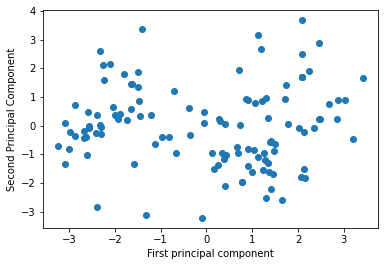

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [ ]:
age=data.Age

In [ ]:
age

0      20
1      21
2      23
3      20
4      23
       ..
112    18
113    19
114    54
115    60
116    23
Name: Age, Length: 117, dtype: int64

In [ ]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l<=25:
            cols.append('red')
        elif l>25 and l<=30:
            cols.append('blue')
        elif l>30 and l<=35:
            cols.append('green')
        elif l>35 and l<40:
            cols.append('cyan')
        elif l>=40 and l<=50:
             cols.append('black')
        else:
             cols.append('yellow')

    return cols

In [ ]:
cols=pltcolor(age)

In [ ]:
cols

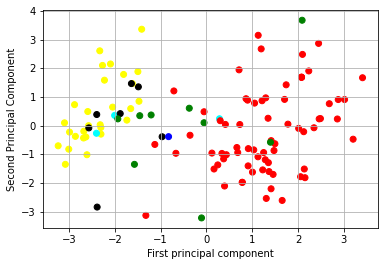

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cols)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component') 
plt.grid(True)
plt.show()

In [ ]:
gen = data.Gender

In [ ]:
gen.head()

0    1
1    1
2    0
3    1
4    0
Name: Gender, dtype: object

In [ ]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        else:
             cols.append('blue')
    return cols

In [ ]:
cols=pltcolor(gen)

In [ ]:
cols

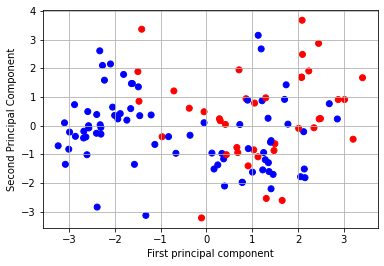

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cols)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component') 
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
predc_1=cluster.fit_predict(x_pca)

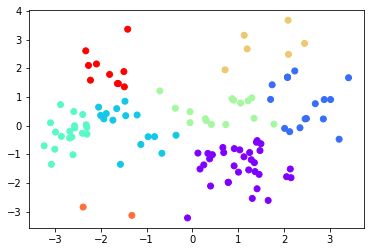

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=cluster.labels_, cmap='rainbow')